In [67]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore') 

data = pd.read_csv("/Users/maiphuong/Library/CloudStorage/OneDrive-ThuyloiUniversity/Learn/Python/Tquan_hoa_dl/BTL_KTM/Netflix Userbase.csv")
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [68]:
data.shape

(2500, 10)

In [69]:
#data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [70]:
#convert join date and last payment date into pandas date format 
data['Join Date'] = pd.to_datetime(data['Join Date'], format='mixed')
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'], format='mixed')

In [71]:
data.describe()

,User ID,Monthly Revenue,Join Date,Last Payment Date,Age
count,2500.00000,2500.000000,2500,2500,2500.000000
mean,1250.50000,12.508400,2022-07-30 08:06:43.200000,2023-06-21 10:33:36,38.795600
min,1.00000,10.000000,2021-05-09 00:00:00,2023-01-07 00:00:00,26.000000
25%,625.75000,11.000000,2022-06-15 00:00:00,2023-05-07 00:00:00,32.000000
50%,1250.50000,12.000000,2022-08-07 00:00:00,2023-06-28 00:00:00,39.000000
75%,1875.25000,14.000000,2022-10-09 00:00:00,2023-08-07 00:00:00,45.000000
max,2500.00000,15.000000,2023-12-01 00:00:00,2023-12-07 00:00:00,51.000000
std,721.83216,1.686851,NaN,NaN,7.171778


In [72]:
data.columns = ['User_ID ', 'Subscription_Type', 'Monthly_Revenue', 'Join_Date','Last_Payment_Date','Country','Age','Gender','Device','Plan Duration']
data.head()

,User_ID,Subscription_Type,Monthly_Revenue,Join_Date,Last_Payment_Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User_ID            2500 non-null   int64         
 1   Subscription_Type  2500 non-null   object        
 2   Monthly_Revenue    2500 non-null   int64         
 3   Join_Date          2500 non-null   datetime64[ns]
 4   Last_Payment_Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


# 1. Số lượng người đăng kí tham gia Netflix

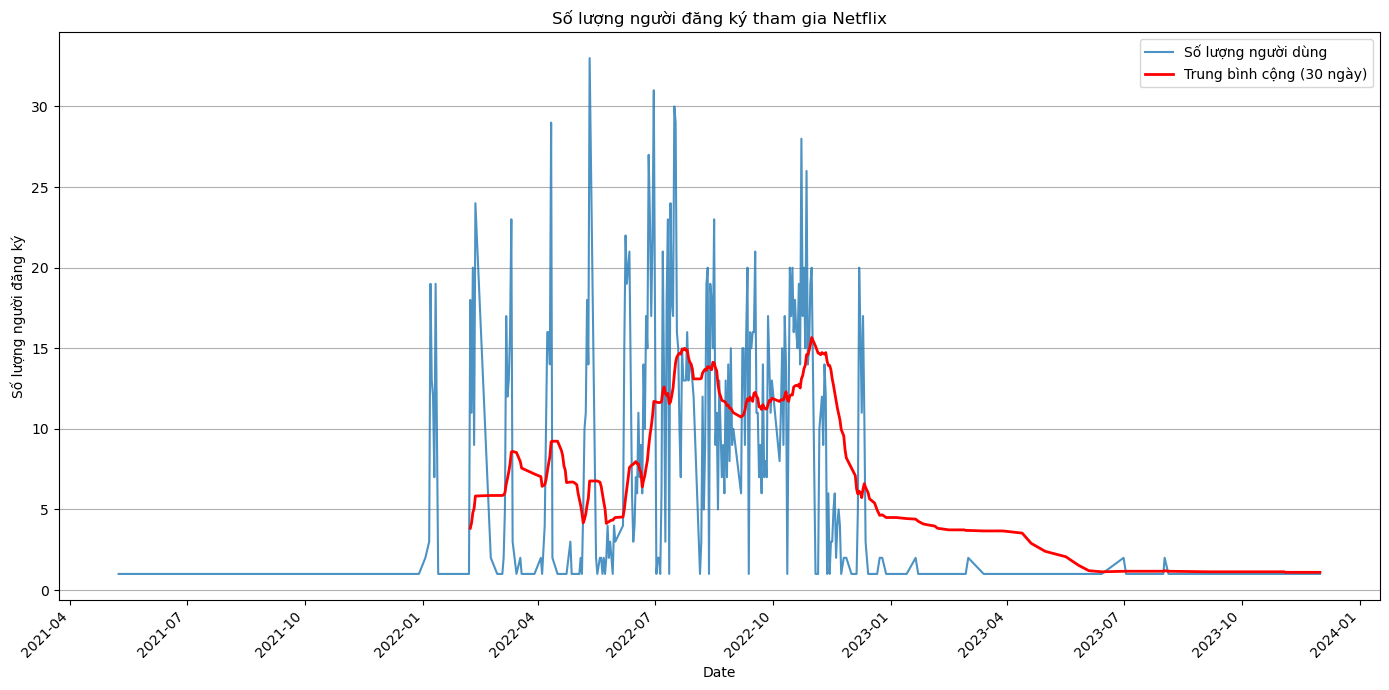

In [74]:
# Số lượng người dùng đã tham gia theo thời gian
users_by_join_date = data['Join_Date'].value_counts().sort_index()

# Đường trung bình cộng với tgian 30 ngày
rolling_mean = users_by_join_date.rolling(window=30).mean()

# Tạo biểu đồ
plt.figure(figsize=(14, 7))
users_by_join_date.plot(label='Số lượng người dùng', alpha=0.8)
rolling_mean.plot(label='Trung bình cộng (30 ngày)', color='red', linewidth=2)

# Thêm tiêu đề
plt.title('Số lượng người đăng ký tham gia Netflix')
plt.xlabel('Date')
plt.ylabel('Số lượng người đăng ký')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Xoay 45 độ cho ngày tháng
plt.legend()
plt.tight_layout()

# 2. Số lượng thuê bao phân phối theo độ tuổi

Text(0, 0.5, 'Số lượng')

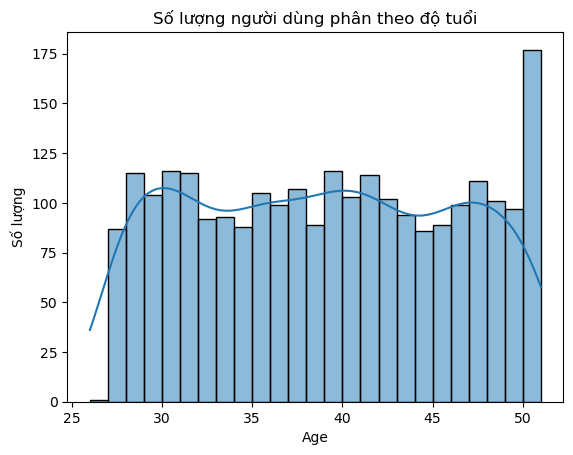

In [75]:

sns.histplot(data["Age"], bins=25, kde=True, common_norm=False)

plt.title("Số lượng người dùng phân theo độ tuổi")
plt.xlabel('Age')
plt.ylabel('Số lượng')

# 3. Phân bổ độ tuổi theo loại đăng kí

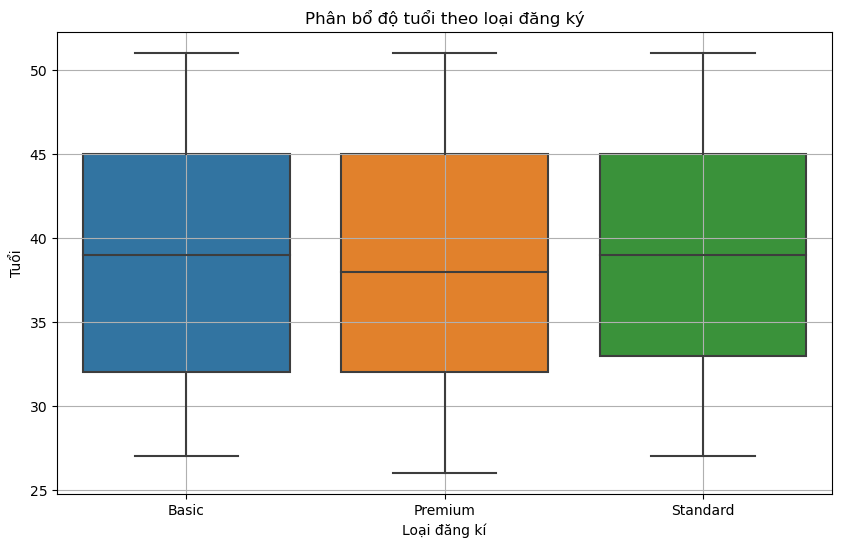

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Subscription_Type', y='Age')

plt.xlabel('Loại đăng kí')
plt.ylabel('Tuổi')
plt.title('Phân bổ độ tuổi theo loại đăng ký')
plt.grid(True)

# 4. Số lượng người đăng kí và phân phối doanh thu trên mỗi loại thiết bị

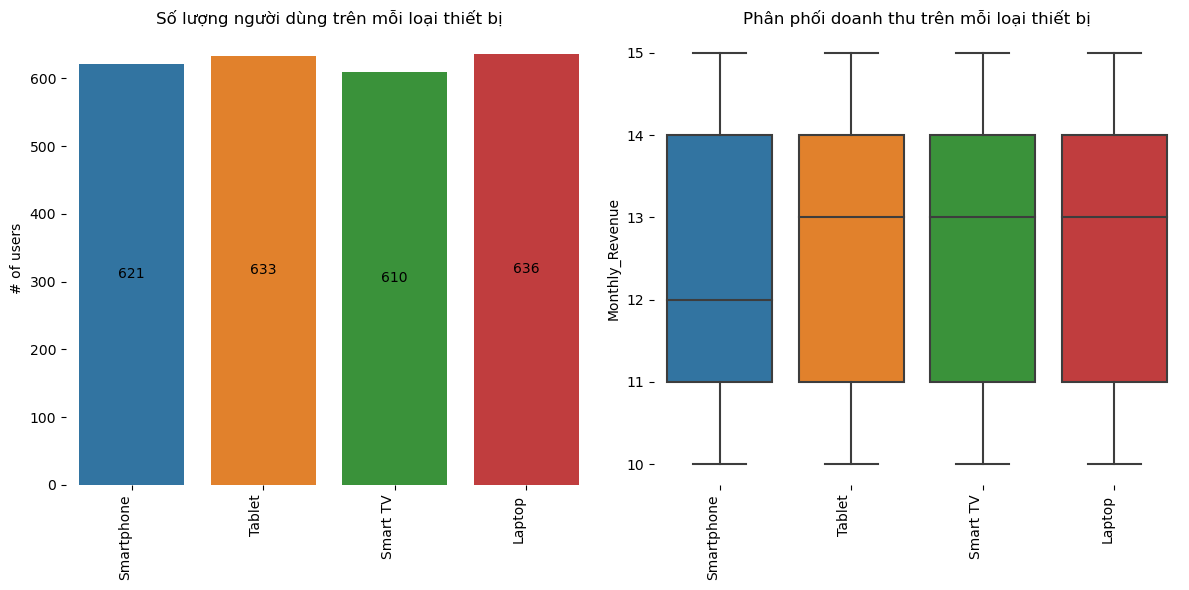

In [77]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
sns.countplot(data, x='Device', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='right')
ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=90, ha='right')
ax[0].set_ylabel('# of users')
ax[0].set_title('Số lượng người dùng trên mỗi loại thiết bị')
ax[0].bar_label(ax[0].containers[0], label_type='center')
ax[0].set_xlabel(None)

sns.boxplot(data, x='Device', y='Monthly_Revenue', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
ax[1].set_title('Phân phối doanh thu trên mỗi loại thiết bị')
ax[1].set_xlabel(None)

sns.despine(fig=fig, left=True, bottom=True)
plt.tight_layout()

# 5. So sánh các thiết bị sử dụng trên từng loại đăng kí

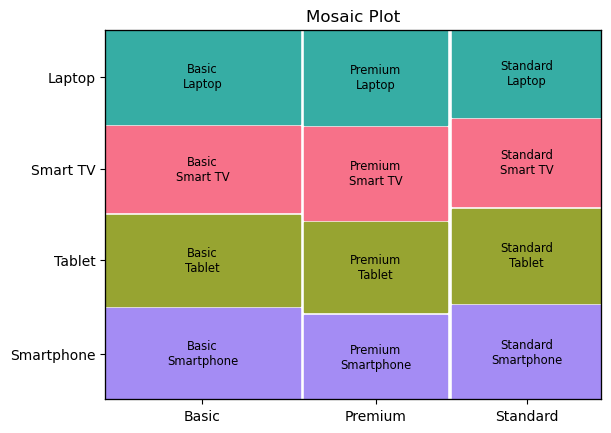

In [78]:
from statsmodels.graphics.mosaicplot import mosaic

device_colors = sns.color_palette('husl',len(set(data['Device'])))

# Tạo từ điển ánh xạ từ giá trị của cột 'Device' sang màu sắc tương ứng
device_color_mapping = dict(zip(set(data['Device']), device_colors))

# Tracer le biểu đồ mosaic plot
mosaic(data, ['Subscription_Type', 'Device'], title='Mosaic Plot', statistic='proportion', properties=lambda key: {'color': device_color_mapping[key[1]]}, gap=0.01)


# Afficher le biểu đồ
plt.show()


# 6. Tổng doanh thu Netflix treo quốc gia

In [79]:
import plotly.express as px

country_data = data.groupby('Country').agg({'Monthly_Revenue': 'sum'}).reset_index()

fig = px.choropleth(country_data, locations='Country', locationmode='country names',
                     color='Monthly_Revenue', title='Tổng doanh thu Netflix theo quốc gia',
                     hover_name='Country', color_continuous_scale='Plasma')
fig.show()


# 7. 

Text(0.5, 0, 'Age')

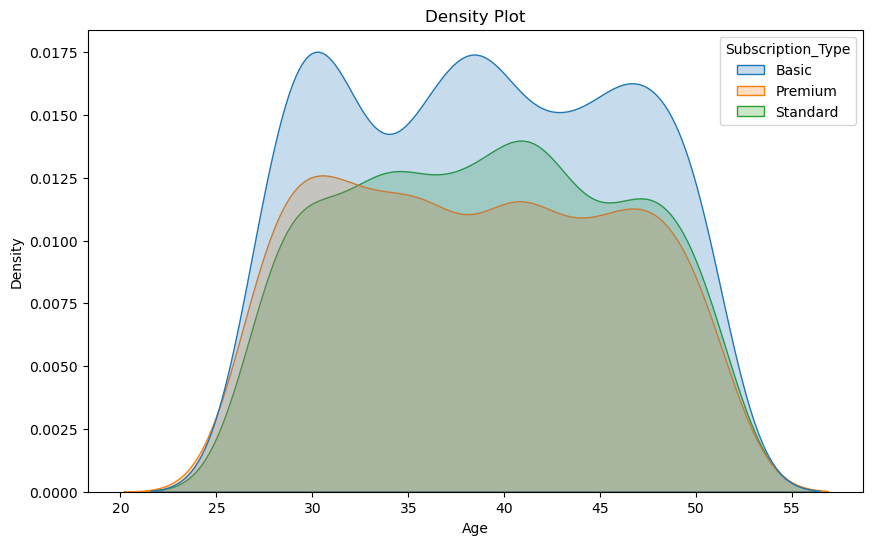

In [80]:
# Vẽ biểu đồ density plot bằng Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Age', hue='Subscription_Type', fill=True, alpha=0.25)
plt.title('Density Plot')
plt.xlabel('Age')

Text(0.5, 0, 'Age')

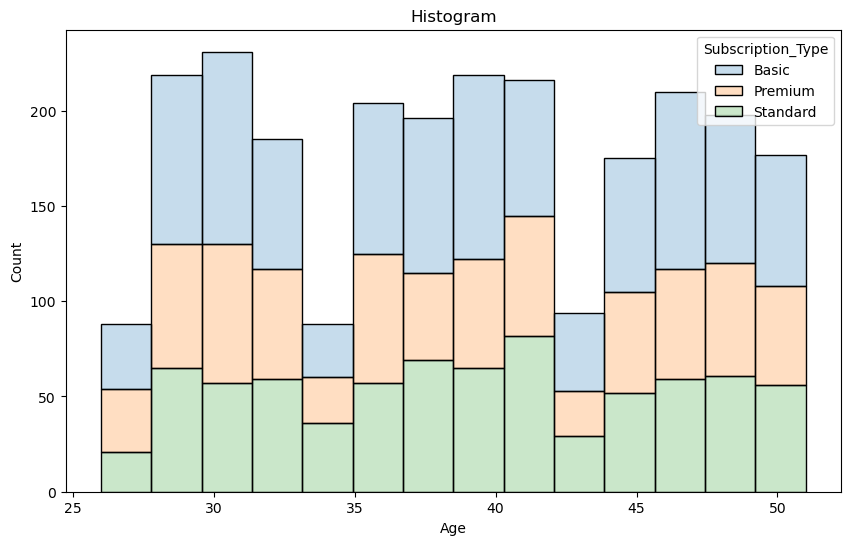

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Subscription_Type', multiple='stack', alpha=0.25)
plt.title('Histogram')
plt.xlabel('Age')

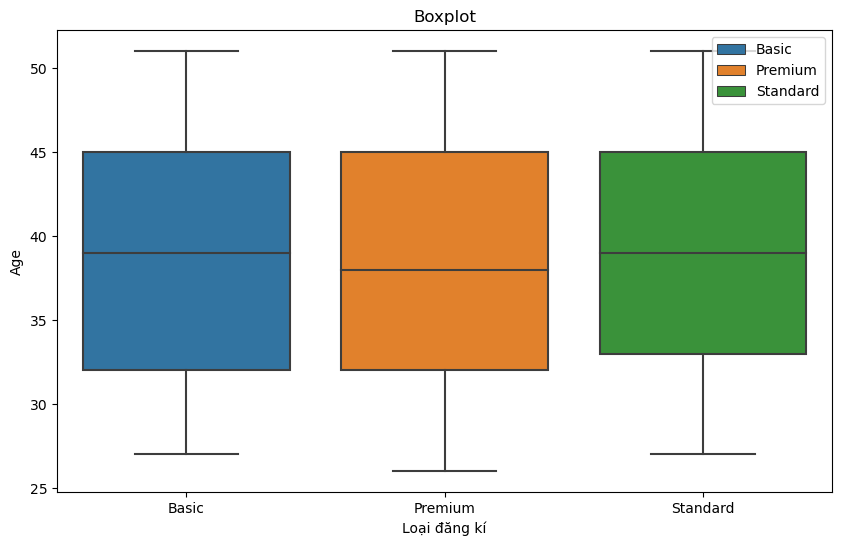

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Subscription_Type', y='Age', hue='Subscription_Type', dodge=False)
plt.title('Boxplot')
plt.xlabel('Loại đăng kí')
plt.ylabel('Age')

plt.legend(loc='upper right')

# 8. Sự tương quan giữa các thành phần

In [83]:
data.dropna(inplace = True)

In [85]:
categorical_col = ['Subscription_Type','Join_Date','Last_Payment_Date', 'Country', 'Gender', 'Device', 'Plan Duration']

for col in categorical_col:
    value_counts = data[col].value_counts().to_dict()
    print(value_counts)  # Corrected line without the typo 'q'
    data[col] = data[col].map(value_counts)
    frequency_count = (data[col].value_counts() / len(data)).to_dict()
    data[col] = data[col].map(frequency_count)

data.head()

{0.3996: 999, 0.3072: 768, 0.2932: 733}
{Timestamp('2022-05-11 00:00:00'): 33, Timestamp('2022-06-30 00:00:00'): 31, Timestamp('2022-07-16 00:00:00'): 30, Timestamp('2022-07-17 00:00:00'): 29, Timestamp('2022-04-11 00:00:00'): 29, Timestamp('2022-10-23 00:00:00'): 28, Timestamp('2022-06-26 00:00:00'): 27, Timestamp('2022-10-27 00:00:00'): 26, Timestamp('2022-02-11 00:00:00'): 24, Timestamp('2022-07-13 00:00:00'): 24, Timestamp('2022-07-11 00:00:00'): 23, Timestamp('2022-06-27 00:00:00'): 23, Timestamp('2022-03-11 00:00:00'): 23, Timestamp('2022-08-16 00:00:00'): 23, Timestamp('2022-06-29 00:00:00'): 22, Timestamp('2022-06-08 00:00:00'): 22, Timestamp('2022-06-11 00:00:00'): 21, Timestamp('2022-09-17 00:00:00'): 21, Timestamp('2022-07-07 00:00:00'): 21, Timestamp('2022-10-14 00:00:00'): 20, Timestamp('2022-10-31 00:00:00'): 20, Timestamp('2022-08-11 00:00:00'): 20, Timestamp('2022-10-25 00:00:00'): 20, Timestamp('2022-09-11 00:00:00'): 20, Timestamp('2022-02-09 00:00:00'): 20, Timestamp

,User_ID,Subscription_Type,Monthly_Revenue,Join_Date,Last_Payment_Date,Country,Age,Gender,Device,Plan Duration
0,1,0.3996,10,0.0380,0.0008,0.3608,28,0.4972,0.2484,1.0
1,2,0.2932,15,0.0380,0.0072,0.1268,35,0.5028,0.2532,1.0
2,3,0.3072,12,0.0380,0.0592,0.5124,42,0.4972,0.2440,1.0
3,4,0.3072,12,0.0528,0.0456,0.5124,51,0.5028,0.2544,1.0
4,5,0.3996,10,0.0380,0.0656,0.5124,33,0.4972,0.2484,1.0


In [60]:
#Chuẩn hoá

data_new = data

data_new.dropna(inplace = True)
value_counts_type = data_new['Subscription_Type'].value_counts().to_dict()
data_new['Subscription_Type'] = data_new['Subscription_Type'].map(value_counts_type)
frequency_count_type = (data_new['Subscription_Type'].value_counts() / len(data) ).to_dict()
data_new['Subscription_Type'] = data_new['Subscription_Type'].map(frequency_count_type)

value_counts_type = data_new['Subscription_Type'].value_counts().to_dict()
data_new['Subscription_Type'] = data_new['Subscription_Type'].map(value_counts_type)
frequency_count_type = (data_new['Subscription_Type'].value_counts() / len(data) ).to_dict()
data_new['Subscription_Type'] = data_new['Subscription_Type'].map(frequency_count_type)

value_counts_type = data_new['Join_Date'].value_counts().to_dict()
data_new['Join_Date'] = data_new['Join_Date'].map(value_counts_type)
frequency_count_type = (data_new['Join_Date'].value_counts() / len(data) ).to_dict()
data_new['Join_Date'] = data_new['Join_Date'].map(frequency_count_type)

value_counts_type = data_new['Last_Payment_Date'].value_counts().to_dict()
data_new['Last_Payment_Date'] = data_new['Last_PaymentDate'].map(value_counts_type)
frequency_count_type = (data['Last_Payment_Date'].value_counts() / len(data) ).to_dict()
data_new['Last_Payment_Date'] = data_new['Last_Payment_Date'].map(frequency_count_type)

value_counts_type = data_new['Country'].value_counts().to_dict()
data_new['Country'] = data_new['Country'].map(value_counts_type)
frequency_count_type = (data_new['Country'].value_counts() / len(data) ).to_dict()
data_new['Country'] = data_new['Country'].map(frequency_count_type)

value_counts_type = data_new['Gender'].value_counts().to_dict()
data_new['Gender'] = data_new['Gender'].map(value_counts_type)
frequency_count_type = (data_new['Gender'].value_counts() / len(data) ).to_dict()
data_new['Gender'] = data_new['Gender'].map(frequency_count_type)

value_counts_type = data_new['Device'].value_counts().to_dict()
data_new['Device'] = data_new['Device'].map(value_counts_type)
frequency_count_type = (data_new['Device'].value_counts() / len(data) ).to_dict()
data_new['Device'] = data_new['Device'].map(frequency_count_type)

value_counts_type = data_new['Plan_Duration'].value_counts().to_dict()
data_new['Plan_Duration'] = data_new['Plan_Duration'].map(value_counts_type)
frequency_count_type = (data_new['Plan_Duration'].value_counts() / len(data) ).to_dict()
data_new['Plan_Duration'] = data_new['Plan_Duration'].map(frequency_count_type)

data_new.head()

KeyError: 'Last_PaymentDate'

In [61]:
cereal_corr= data_new.corr()
cereal_corr

ValueError: could not convert string to float: 'United States'

In [34]:
one_corr=np.ones_like(cereal_corr,dtype=bool)
#Lấy 1 nửa matran
mask = np.triu(one_corr)
fix, ax=plt.subplots(figsize=(10,8))
sns.heatmap(data=cereal_corr, mask=mask, annot=True)

NameError: name 'cereal_corr' is not defined